# Laboratorio 3
## Procesamiento de Imágenes
### Deteccion de Movimiento
Integrantes: Isabel Marx Vergara

In [ ]:
#importación de librerías

from google.colab import drive
from google.colab import files
from IPython.display import clear_output
import numpy as np
from numpy.core.memmap import uint8
import matplotlib.pyplot as plt
from matplotlib import transforms
import numpy
import cv2
from google.colab.patches import cv2_imshow
from skimage.io import imread, imshow
from skimage.exposure import histogram, cumulative_distribution
from skimage.transform import rotate
from skimage import img_as_ubyte, img_as_float
from scipy.stats import norm
import math
from skimage.feature import local_binary_pattern

In [ ]:
#carga de imagenes

drive.mount('/content/drive')
L = ['fondo']
for i in range(1,4):
  string = 'seq' + str(i)
  L.append(string)
LN = [175,500,400,175]

Im = {}
for i in range(len(L)):
  Im[L[i]] = {}
  for j in range(1,LN[i]+1):
    string = '000' + str(j)
    string = string[-4:]
    string = '/content/drive/My Drive/Lab-Mov/' + L[i] + '/image-' + string + '.jpg'
    Im[L[i]][j] = string

Mounted at /content/drive


In [ ]:
def matrix(img):
  """
    funcion que retorna una tupla cuyos elementos son la dimensión de la matriz de datos asociado a una imagen cargada previamente y la propia matriz a color
    
    :param str img: nombre de la imagen a obtener su matriz de datos

    return (img.shape,img)
  """
  img = imread(img)
  return(img)

In [ ]:
def matrix0(img):
  """
  funcion que retorna una tupla cuyos elementos son la dimensión de la matriz de datos asociado a una imagen cargada previamente y la propia matriz en escala de grises
    
  :param str img: nombre de la imagen a obtener su matriz de datos

  return (img.shape,img)
  """
  img = cv2.imread(img,0)
  return(img)

In [ ]:
def greys(img):
  """
  funcion que retorna una visualización en escala de grises de la imagen asociada al nombre img y su histograma
    
  :param str img: nombre de la imagen a obtener su visualización

  return 
  """
  img = cv2.imread(img,0)
  fig, axs = plt.subplots(1, 2, figsize=(12,3.5))
  axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
  axs[0].set_title('Image')
  axs[1].hist(img.ravel(),256,[0,255],color='k')
  axs[1].set_title('Histogram')
  axs[1].set(ylabel='Pixels Frequency')
  axs[1].set(xlabel='Intensity')
  clear_output(wait=True)

In [ ]:
def display(img):
  """
  funcion que retorna una visualización de la imagen asociada al nombre img
    
  :param str img: nombre de la imagen a obtener su visualización

  return (img.shape,img)
  """
  img = imread(img)
  plt.imshow(img)
  plt.title('Image')
  clear_output(wait=True)

In [ ]:
def display0(img):
  img = cv2.imread(img,0)
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.title('Image')
  clear_output(wait=True)

# 1. Implemente un detector de movimiento

In [ ]:
def det_mov(folder,image,threshold):
  sequence = Im[folder]
  b = matrix0(sequence[image])
  b = b.shape
  R = np.zeros([b[0],b[1]]).astype(int)
  Um = np.zeros([b[0],b[1]]).astype(int)
  i = 10
  th = 40
  Mi = matrix0(sequence[image])
  Mi = Mi.astype(int)
  Mi_1 = matrix0(sequence[image+1])
  Mi_1 = Mi_1.astype(int)
  R = np.absolute(Mi - Mi_1).astype(int)
  for j in range(len(R)):
    for k in range(len(R[j])):
      if R[j][k] > th:
        Um[j][k] = 255
      else:
        Um[j][k] = 0
  plt.imshow(Um, cmap='gray', vmin=0, vmax=255)
  plt.title('Image')
  clear_output(wait=True)

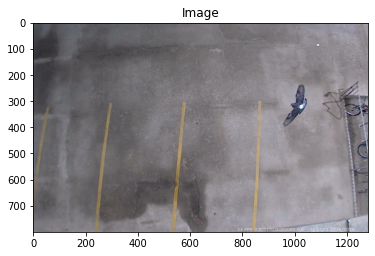

In [ ]:
display(Im['seq1'][11])

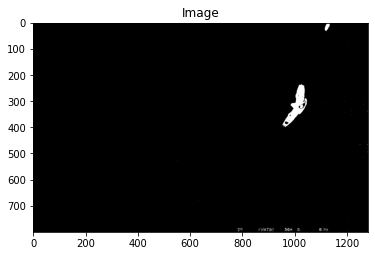

In [ ]:
det_mov('seq1',10,40)

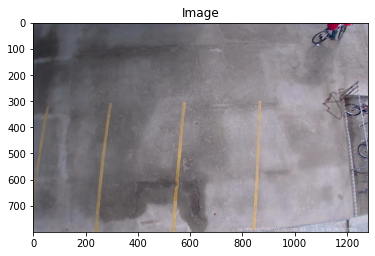

In [ ]:
display(Im['seq2'][374])

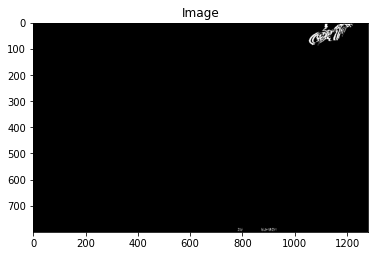

In [ ]:
det_mov('seq2',373,40)

2. Utilizando la secuencia de imágenes de la carpeta “fondo”, genere un modelo de fondo de
dos matrices calculando el promedio de los cuadros (matriz 1) y la desviación estándar (matriz
2). Elija un umbral apropiado y aplíquelo para detectar movimiento sobre las secuencias de
imágenes. Entregue las matrices del modelo de fondo. Muestre ejemplos de detección de
movimiento y explique la forma que adoptan los pixeles de primer plano. 

sequence = Im['fondo']
m = matrix0(sequence[1])
s = m.shape
M = np.zeros([len(sequence),s[0],s[1]])
for i in range(len(sequence)):
  m = matrix0(sequence[i+1])
  M[i] = m
mu = np.mean(M,axis=0)
sigma = np.std(M,axis=0)

In [ ]:
def mu_sigma():
  sequence = Im['fondo']
  m = matrix0(sequence[1])
  s = m.shape
  M = np.zeros([len(sequence),s[0],s[1]])
  for i in range(len(sequence)):
    m = matrix0(sequence[i+1])
    M[i] = m
  mu = np.mean(M,axis=0)
  sigma = np.std(M,axis=0)
  return(mu,sigma)

In [ ]:
[mu,sigma] = mu_sigma()

In [ ]:
def movement(img,folder,mu,sigma):
  alfa = 40
  sequence = Im['fondo']
  m = matrix0(sequence[1])
  s = m.shape
  for i in range(img,img+1):#range(len(sequence)):
    m = matrix0(Im[folder][i+1])
    m0 = np.zeros(m.shape)
    for j in range(s[0]):
      for k in range(s[1]):
        if m[j][k] < mu[j][k] - alfa*sigma[j][k] or m[j][k] > mu[j][k] + alfa*sigma[j][k]:
          m0[j][k] = 255
  return(m0)

In [ ]:
def display_movement(img,folder,m0):
  plt.figure()
  plt.imshow(m0, cmap='gray', vmin=0, vmax=255)
  plt.title('Movement pixel')
  clear_output(wait=True)

In [ ]:
m1_11 = movement(11,'seq1',mu,sigma)

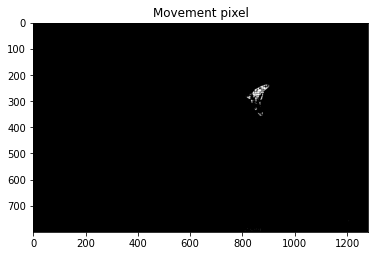

In [ ]:
display_movement(11,'seq1',m1_11)

In [ ]:
m2_374 = movement(374,'seq2',mu,sigma)

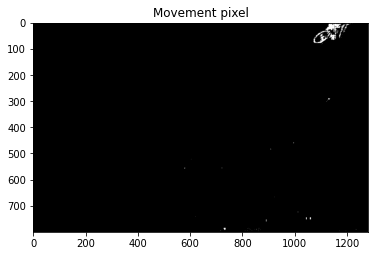

In [ ]:
display_movement(374,'seq2',m2_374)

In [ ]:
def rows_cols(m1):
  sums_rows = []
  for i in range(len(m1)):  
    sum_row = 0
    for j in range(len(m1[i])):  
      sum_row = sum_row + m1[i][j]
    sums_rows.append(sum_row)
  sums_cols = []
  for j in range(len(m1[i])):
    sum_col = 0
    for i in range(len(m1)):  
      sum_col = sum_col + m1[i][j]
    sums_cols.append(sum_col)
  sums_rows = np.array(sums_rows)
  sums_cols = np.array(sums_cols)
  return(sums_rows,sums_cols)

In [ ]:
def display_rows_cols(m1,sums_rows,sums_cols):
  fig, axs = plt.subplots(1, 2, figsize=(14,4))
  axs[0].imshow(m1, cmap='gray', vmin=0, vmax=255)
  axs[0].set_title('Movement pixel')
  axs[1].barh(range(len(sums_rows)),sums_rows,color='k')
  axs[1].invert_yaxis() 
  axs[1].set_title('Rows histogram')
  axs[1].set(ylabel='Pixel sum')
  axs[1].set(xlabel='Row')
  plt.figure()
  plt.bar(range(len(sums_cols)),sums_cols,color='k')
  plt.title('Columns histogram')
  plt.xlabel('Column')
  clear_output(wait=True)

In [ ]:
[s_r1_11,s_c1_11] = rows_cols(m1_11)

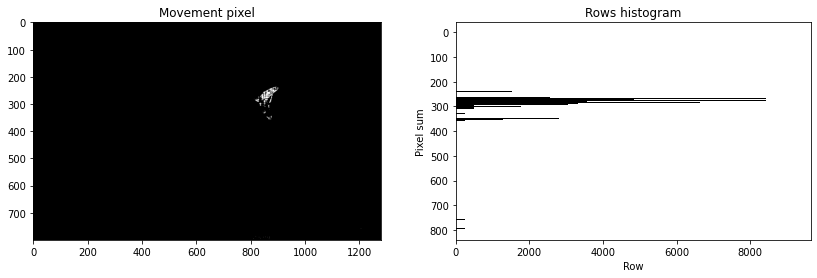

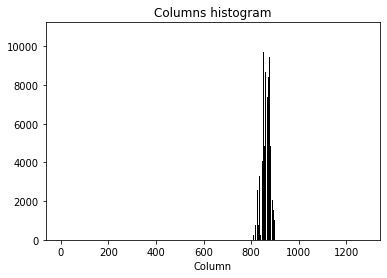

In [ ]:
display_rows_cols(m1_11,s_r1_11,s_c1_11)

In [ ]:
def box(m,sum_rows,sum_cols):
  sums = [sum_rows,sum_cols]
  row_sides = []
  col_sides = []
  for k in [0,1]:
    L = len(sums[k])
    b = -1
    e = 0
    c = 0
    i = 0
    while i < L-5:
      if b == -1:
        s1 = sums[k][i]
        s2 = sums[k][i+1]
        s3 = sums[k][i+2]
        if s1 > 2500:
          if s2 > 2500:
            if s3 > 2500:
              b = i
              c = 3
              i += 3
            else:
              b = i
              c = 2
              i += 2
          else:
            i += 1
        else:
          i += 1
      elif b != -1 and c > 20:
        s1 = sums[k][i]
        s2 = sums[k][i+1]
        s3 = sums[k][i+2]
        s4 = sums[k][i+3]
        s5 = sums[k][i+4]
        if [s1,s2,s3,s4,s5] == [0,0,0,0,0]:
          e = i-1
          side = list(range(b,e+1))
          if k == 0:
            row_sides.append(side)
          else:
            col_sides.append(side)
          b = -1
          e = 0
          c = 0
          i += 1
        else:
          i += 1
      else:
        if b != -1:
          c += 1
        i += 1

  real_rows = []
  real_cols = []
  for r in row_sides:
    for c in col_sides:
      h = 0
      for i in r:
        for j in c:
          if m[i][j] != 0:
            h += 1
      if h > 50:
        real_rows.append(r)
        real_cols.append(c)
      h = 0
  return(m,real_rows,real_cols)

In [ ]:
def display_box(img,folder,box):
  m = box[0]
  real_rows = box[1]
  real_cols = box[2]
  plt.figure()
  for i in range(len(real_rows)):
    Lr = len(real_rows[i])
    Lc = len(real_cols[i])
    row1 = [real_rows[i][0]]*Lc
    row2 = [real_rows[i][-1]]*Lc
    col1 = [real_cols[i][0]]*Lr
    col2 = [real_cols[i][-1]]*Lr
    colors = ['deeppink','g','y','r','b','c']
    plt.imshow(m, cmap='gray', vmin=0, vmax=255)
    plt.plot(col1,real_rows[i],colors[i])
    plt.plot(col2,real_rows[i],colors[i])
    plt.plot(real_cols[i],row1,colors[i])
    plt.plot(real_cols[i],row2,colors[i])
    string = 'Movement detected on image ' + str(img) +', sequence ' + folder[-1]
    plt.title(string)

In [ ]:
"""
b1_11 = box(m1_11,s_r1_11,s_c1_11)
display_box(11,'seq1',b1_11)
"""

"\nb1_11 = box(m1_11,s_r1_11,s_c1_11)\ndisplay_box(11,'seq1',b1_11)\n"

In [ ]:
"""
m2_257 = movement(257,'seq2',mu,sigma)
[s_r2_257,s_c2_257] = rows_cols(m2_257)
b2_257 = box(m2_257,s_r2_257,s_c2_257)
display_box(257,'seq2',b2_257)
"""

"\nm2_257 = movement(257,'seq2',mu,sigma)\n[s_r2_257,s_c2_257] = rows_cols(m2_257)\nb2_257 = box(m2_257,s_r2_257,s_c2_257)\ndisplay_box(257,'seq2',b2_257)\n"

In [ ]:
"""
m2_331 = movement(331,'seq2',mu,sigma)
[s_r2_331,s_c2_331] = rows_cols(m2_331)
b2_331 = box(m2_331,s_r2_331,s_c2_331)
display_box(331,'seq2',b2_331)
"""

"\nm2_331 = movement(331,'seq2',mu,sigma)\n[s_r2_331,s_c2_331] = rows_cols(m2_331)\nb2_331 = box(m2_331,s_r2_331,s_c2_331)\ndisplay_box(331,'seq2',b2_331)\n"

In [ ]:
"""
m3_117 = movement(117,'seq3',mu,sigma)
[s_r3_117,s_c3_117] = rows_cols(m3_117)
b3_117 = box(m3_117,s_r3_117,s_c3_117)
display_box(117,'seq3',b3_117)
"""

"\nm3_117 = movement(117,'seq3',mu,sigma)\n[s_r3_117,s_c3_117] = rows_cols(m3_117)\nb3_117 = box(m3_117,s_r3_117,s_c3_117)\ndisplay_box(117,'seq3',b3_117)\n"

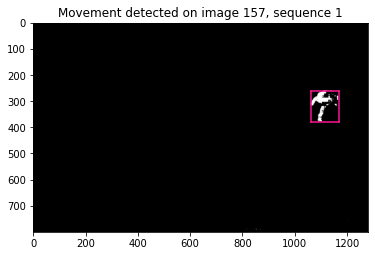

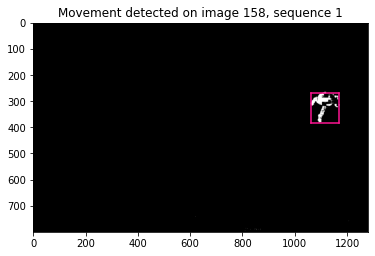

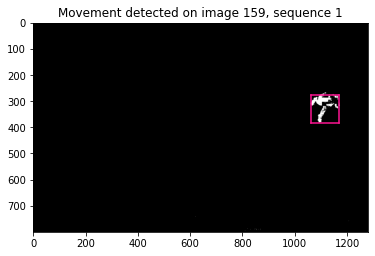

In [ ]:
m1_157 = movement(157,'seq1',mu,sigma)
[s_r1_157,s_c1_157] = rows_cols(m1_157)
b1_157 = box(m1_157,s_r1_157,s_c1_157)

m1_158 = movement(158,'seq1',mu,sigma)
[s_r1_158,s_c1_158] = rows_cols(m1_158)
b1_158 = box(m1_158,s_r1_158,s_c1_158)

m1_159 = movement(159,'seq1',mu,sigma)
[s_r1_159,s_c1_159] = rows_cols(m1_159)
b1_159 = box(m1_159,s_r1_159,s_c1_159)

display_box(157,'seq1',b1_157)
display_box(158,'seq1',b1_158)
display_box(159,'seq1',b1_159)

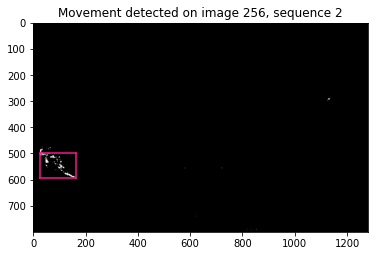

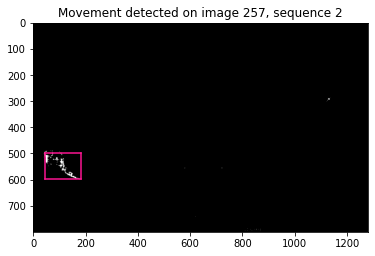

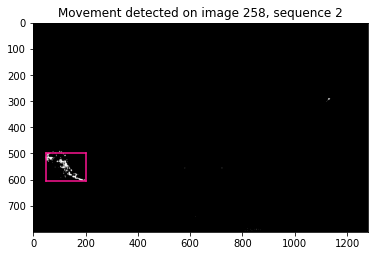

In [ ]:
m2_256 = movement(256,'seq2',mu,sigma)
[s_r,s_c] = rows_cols(m2_256)
b2_256 = box(m2_256,s_r,s_c)

m2_257 = movement(257,'seq2',mu,sigma)
[s_r,s_c] = rows_cols(m2_257)
b2_257 = box(m2_257,s_r,s_c)

m2_258 = movement(258,'seq2',mu,sigma)
[s_r,s_c] = rows_cols(m2_258)
b2_258 = box(m2_258,s_r,s_c)

display_box(256,'seq2',b2_256)
display_box(257,'seq2',b2_257)
display_box(258,'seq2',b2_258)

In [ ]:
def predict(img,folder,box1,box2,box3,m4):
  b1 = box1[1:]
  b2 = box2[1:]
  b3 = box3[1:]
  m = m4

  h = []
  w = []
  x = []
  y = []
  bs = [b1,b2,b3]
  for b in bs:
    maxb_cols = max(b[1][0][-1],b[1][0][0])
    minb_cols = min(b[1][0][-1],b[1][0][0])
    maxb_rows = max(b[0][0][-1],b[0][0][0])
    minb_rows = min(b[0][0][-1],b[0][0][0])

    h.append(maxb_rows-minb_rows+1)
    w.append(maxb_cols-minb_cols+1)
    x.append(minb_cols+w[-1]/2)
    y.append(minb_rows+h[-1]/2)
  T = [h,w,x,y]
  E = []
  for e in T:
    if e[1]-e[0] == 0:
      E.append((e[2]-e[1])/1)
    else:
      E.append((e[2]-e[1])/(e[1]-e[0]))

  A = E[0]
  B = E[1]
  C = E[2]
  D = E[3]

  h4 = int(math.floor(h[2] + A*(h[2]-h[1])))
  w4 = int(math.floor(w[2] + B*(w[2]-w[1])))
  x4 = int(math.floor(x[2] + C*(x[2]-x[1])))
  y4 = int(math.floor(y[2] + D*(y[2]-y[1])))

  x41 = int(math.floor(x4-w4/2))
  col1 = [x41]*h4
  x42 = int(math.floor(x4+w4/2))
  col2 = [x42]*h4
  y41 = int(math.ceil(y4-h4/2))
  row1 = [y41]*w4
  y42 = int(math.ceil(y4+h4/2))
  row2 = [y42]*w4
  height = range(y41,y42)
  width = range(x41,x42)
  return(box1,box2,box3,m,col1,col2,height,row1,row2,width)

In [ ]:
def display_predict(img,folder,pred):
  b1 = pred[0]
  b2 = pred[1]
  b3 = pred[2]
  m = pred[3]
  col1 = pred[4]
  col2 = pred[5]
  height = pred[6]
  row1 = pred[7]
  row2 = pred[8]
  width = pred[9]
  
  display_box(img-3,folder,b1)
  display_box(img-2,folder,b2)
  display_box(img-1,folder,b3)
  plt.figure()
  #plt.imshow(m, cmap='gray', vmin=0, vmax=255)
  img0 = imread(Im[folder][img])
  plt.imshow(img0)
  plt.plot(col1,height,'lime')
  plt.plot(col2,height,'magenta')
  plt.plot(width,row1,'cyan')
  plt.plot(width,row2,'yellow')
  string = 'Predicted movement for image ' + str(img) + ', sequence ' + folder[-1]
  plt.title(string)

In [ ]:
m2_259 = movement(259,'seq2',mu,sigma)

In [ ]:
p2_259 = predict(259,'seq2',b2_256,b2_257,b2_258,m2_259)

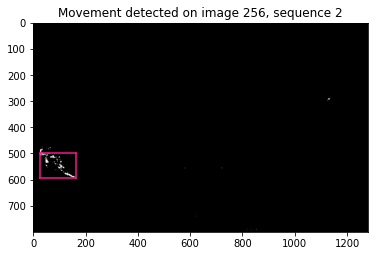

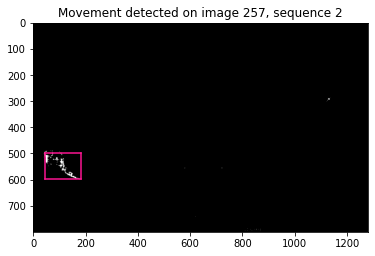

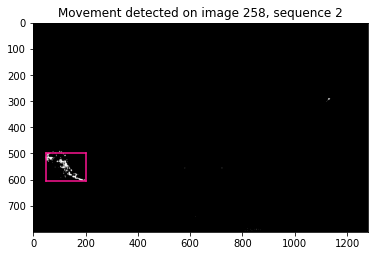

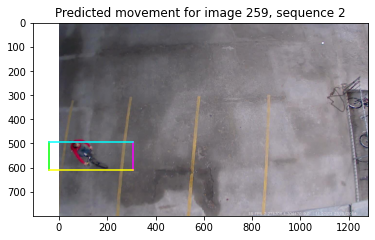

In [ ]:
display_predict(259,'seq2',p2_259)

In [ ]:
m1_160 = movement(160,'seq1',mu,sigma)
p1_160 = predict(160,'seq1',b1_157,b1_158,b1_159,m1_160)

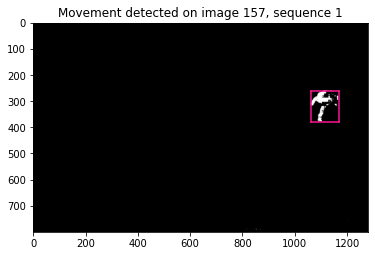

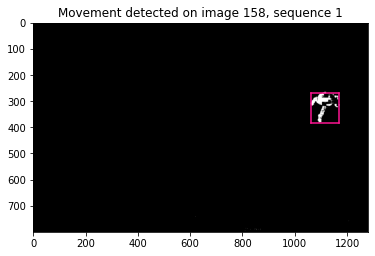

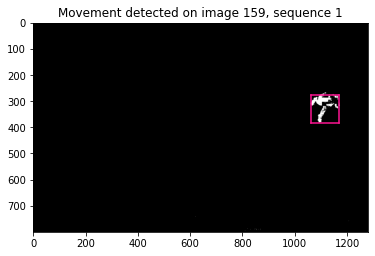

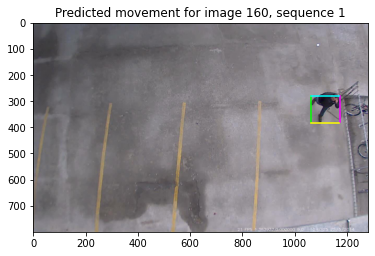

In [ ]:
display_predict(160,'seq1',p1_160)

In [ ]:
m2_328 = movement(328,'seq2',mu,sigma)
[s_r,s_c] = rows_cols(m2_328)
b2_328 = box(m2_328,s_r,s_c)

m2_329 = movement(329,'seq2',mu,sigma)
[s_r,s_c] = rows_cols(m2_329)
b2_329 = box(m2_329,s_r,s_c)

m2_330 = movement(330,'seq2',mu,sigma)
[s_r,s_c] = rows_cols(m2_330)
b2_330 = box(m2_330,s_r,s_c)

m2_331 = movement(331,'seq2',mu,sigma)

p2_331 = predict(331,'seq2',b2_328,b2_329,b2_330,m2_331)

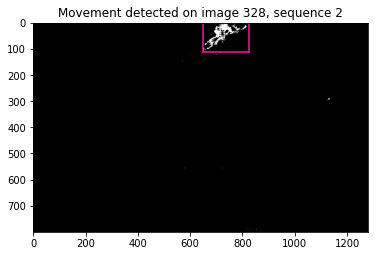

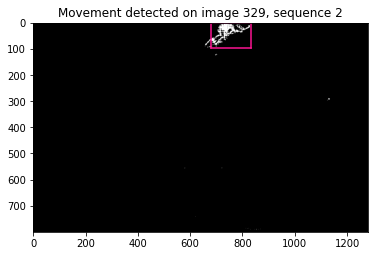

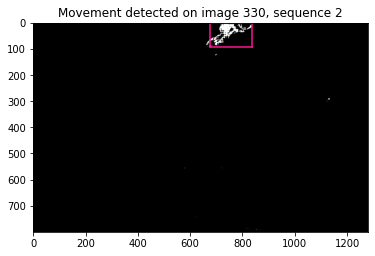

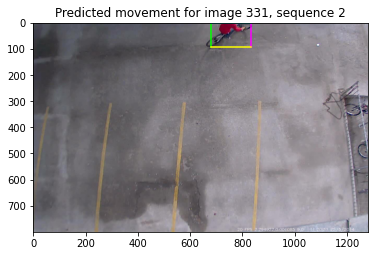

In [ ]:
display_predict(331,'seq2',p2_331)